# Bar Graph Classification

Teng-Jui Lin

- Created: 2023-05-27
- Edited: 2024-07-15

In [1]:
from bar_constants import *
set_save_fig_rc()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Article Classification

In [2]:
article_df = pd.read_excel(bar_classification_sorted_filepath)
article_df = article_df.set_index('Journal')
article_df

,Total number of articles,Number of articles without bar graphs,Number of articles with bar graphs,Number of articles with correct bar graphs,Number of articles with incorrect bar graphs,Number of articles with nonzero bar graph y-min,Number of articles with logarithmic bar graph y axis,Number of articles with other bar graph misrepresentations,Percentage of articles without bar graphs,Percentage of articles with bar graphs,Percentage of articles with correct bar graphs,Percentage of articles with incorrect bar graphs,Percentage of articles with nonzero bar graph y-min,Percentage of articles with logarithmic bar graph y axis,Percentage of articles with other bar graph misrepresentations
Journal,,,,,,,,,,,,,,,
Nature Biomedical Engineering *,109,18,91,50,41,23,21,2,16.513761,83.486239,54.945055,45.054945,25.274725,23.076923,2.197802
Cell,297,14,283,177,106,48,60,9,4.713805,95.286195,62.544170,37.455830,16.961131,21.201413,3.180212
Science Translational Medicine,248,24,224,141,83,45,35,18,9.677419,90.322581,62.946429,37.053571,20.089286,15.625000,8.035714
ACS Nano †,824,99,725,475,250,181,56,36,12.014563,87.985437,65.517241,34.482759,24.965517,7.724138,4.965517
Science Immunology,116,5,111,73,38,20,22,4,4.310345,95.689655,65.765766,34.234234,18.018018,19.819820,3.603604
Nature Cancer *,75,0,75,53,22,7,17,3,0.000000,100.000000,70.666667,29.333333,9.333333,22.666667,4.000000
Nature †,554,67,487,357,130,79,59,10,12.093863,87.906137,73.305955,26.694045,16.221766,12.114990,2.053388
Nature Nanotechnology †*,55,10,45,33,12,6,5,2,18.181818,81.818182,73.333333,26.666667,13.333333,11.111111,4.444444
Nature Biotechnology *,157,17,140,103,37,12,24,5,10.828025,89.171975,73.571429,26.428571,8.571429,17.142857,3.571429


In [3]:
# extract sub-df for plotting
percent_bar_df = article_df.loc[:, [
    'Percentage of articles with bar graphs', 
    'Percentage of articles without bar graphs',
]]
percent_bar_correct_df = article_df.loc[:, [
    'Percentage of articles with incorrect bar graphs', 
    'Percentage of articles with correct bar graphs',
]]
percent_bar_incorrect_df = article_df.loc[:, [
    'Percentage of articles with nonzero bar graph y-min',
    'Percentage of articles with logarithmic bar graph y axis',
    'Percentage of articles with other bar graph misrepresentations',
]]
total_articles_series = article_df.loc[:, 'Total number of articles']

In [4]:
# mutually exclusive categories
# percentage based on number of all articles
percent_bar_df.loc['Total', :]

Percentage of articles with bar graphs       88.131089
Percentage of articles without bar graphs    11.868911
Name: Total, dtype: float64

In [5]:
# mutually exclusive categories
# percentage based on number of all articles
percent_bar_correct_df.loc['Total', :]

Percentage of articles with incorrect bar graphs    29.346734
Percentage of articles with correct bar graphs      70.653266
Name: Total, dtype: float64

In [6]:
# non-mutually exclusive categories
# percentage based on number of articles with at least 1 incorrect bar graph
# note this percentage does not add up to the above percentage
# because one article could have multiple types of problems
percent_bar_incorrect_df.loc['Total', :]

Percentage of articles with nonzero bar graph y-min               17.554439
Percentage of articles with logarithmic bar graph y axis          11.758794
Percentage of articles with other bar graph misrepresentations     3.450586
Name: Total, dtype: float64

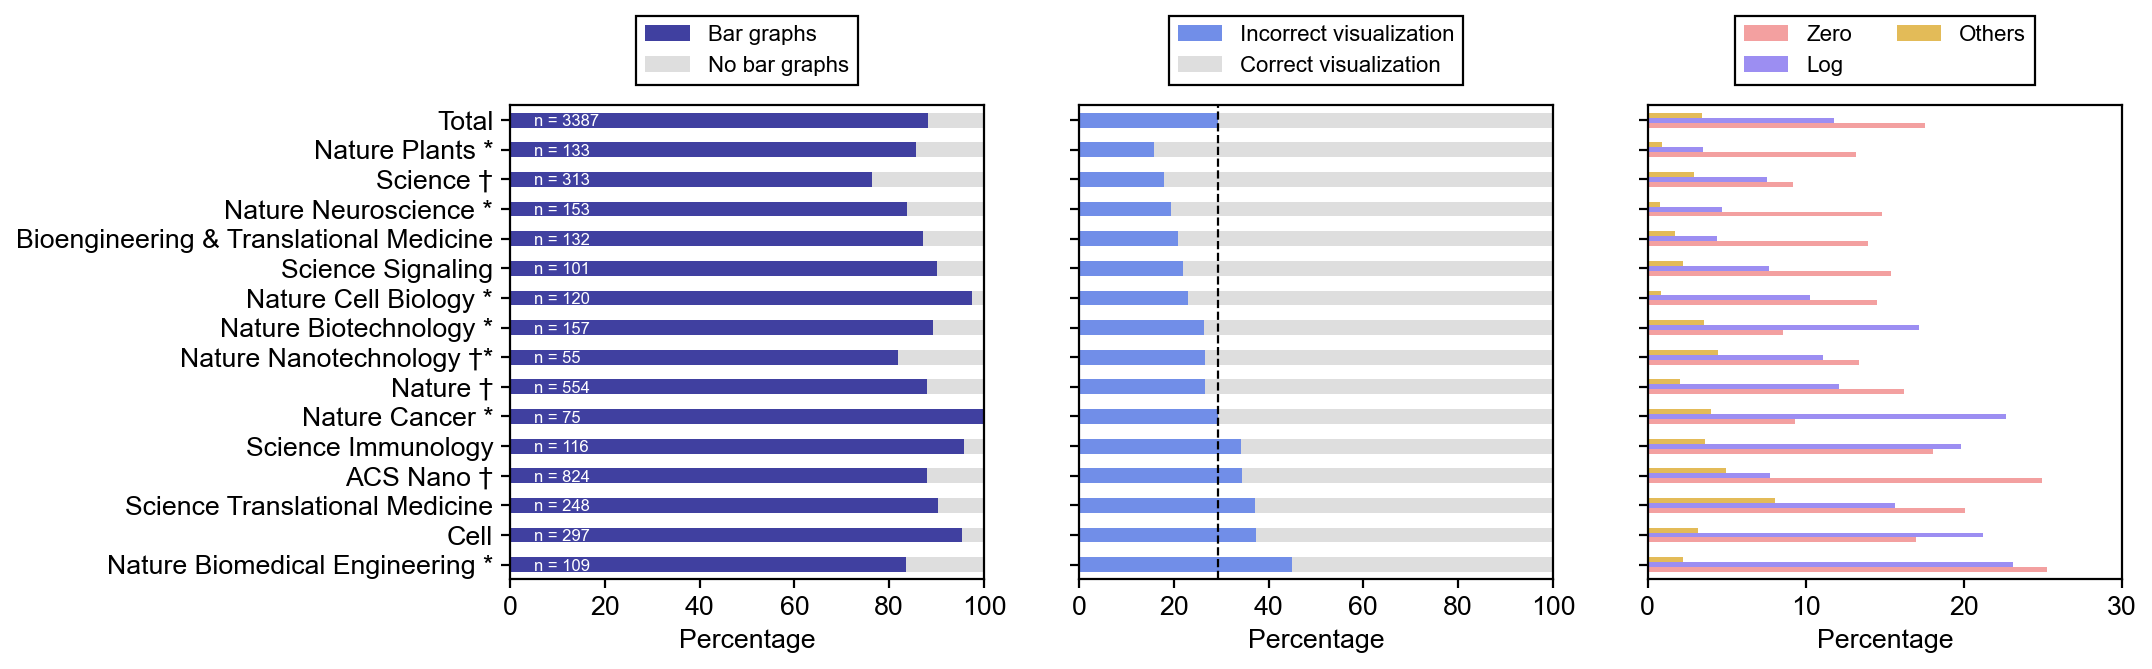

In [8]:
alpha = 0.75
total_misuse_percentage = percent_bar_correct_df.loc['Total', 'Percentage of articles with incorrect bar graphs']
fig, axs = plt.subplots(1, 3, figsize=(13, 4), sharey=True)
percent_bar_df.plot(
    kind='barh', 
    stacked=True, 
    ax=axs[0],
    legend=False,
    alpha=alpha,
    color=['navy', 'lightgray'], 
)
percent_bar_correct_df.plot(
    kind='barh', 
    stacked=True, 
    ax=axs[1],
    legend=False,
    alpha=alpha,
    color=['royalblue', 'lightgray'], 
)
percent_bar_incorrect_df.plot(
    kind='barh', 
    stacked=False, 
    ax=axs[2],
    legend=True,
    alpha=alpha,
    color=['lightcoral', 'mediumslateblue', 'goldenrod'], 
)

# iterable plot settings
for i in range(2):
    axs[i].set_xlim(0, 100)
for i in range(3):
    axs[i].set_box_aspect(1)
    axs[i].set_xlabel('Percentage')

# individual plot settings
axs[0].set_ylabel('')
axs[2].set_xlim(0, 30)

# plot legends
axs[0].legend(
    ['Bar graphs', 'No bar graphs'], 
    bbox_to_anchor=(0.5, 1.02), 
    loc='lower center',
)
axs[1].legend(
    ['Incorrect visualization', 'Correct visualization'], 
    bbox_to_anchor=(0.5, 1.02), 
    loc='lower center',
)
axs[2].legend(
    ['Zero', 'Log', 'Others'], 
    bbox_to_anchor=(0.5, 1.02), 
    loc='lower center',
    ncol=2,
)

# overlay n onto bars in subplot 1/3
for i in range(total_articles_series.shape[0]):
    try:
        axs[0].text(5, i - 0.2, f'n = {int(total_articles_series.iloc[i])}', fontsize=7.5, color='w')
    except ValueError:
        pass

# add average line to subplot 2/3
axs[1].axvline(
    total_misuse_percentage,
    color='k',
    lw=1,
    ls='--'
)

## Correlation of article classification statistics

### Construct structured files for quantity annotation

Change `generate_annotation` to True to generate (or override) a fresh quantity annotation sheet.

In [9]:
generate_annotation = False
file_df = pd.DataFrame()
for j, mistake in enumerate(MISTAKES):
    for i, journal in enumerate(JOURNALS):
        filepath = f'data/misused_bar_graph_figures/{journal}/{mistake}'
        file_list = pd.Series(sorted(os.listdir(filepath)))
        file_list = file_list[file_list.str.contains('.png')]
        file_list = file_list.str.replace('.png', '')
        figidx = file_list.copy()
        file_list = file_list.str.replace('fig', '')
        new_file_df = file_list.str.split('_', expand=True)
        new_file_df.columns = ['DOI', 'Mistake', 'Fig ID']
        new_file_df['Journal'] = journal
        new_file_df['Fig Index'] = figidx
        new_file_df = new_file_df.set_index('Fig Index')
        if generate_annotation:
            new_file_df.to_excel(os.path.join(filepath, 'annotation.xlsx'))

### Import quantity annotation data

In [10]:
bar_annot_df = pd.DataFrame()
for j, mistake in enumerate(MISTAKES):
    for i, journal in enumerate(JOURNALS):
        filepath = f'data/misused_bar_graph_figures/{journal}/{mistake}'
        filename = os.path.join(filepath, 'annotation.xlsx')
        bar_annot_df_ = pd.read_excel(filename)
        bar_annot_df = pd.concat([bar_annot_df, bar_annot_df_]).reset_index(drop=True)
bar_annot_df.shape

(3566, 11)

In [11]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0]

DOI                           Mistake  Physical quantity II
10.1002:btm2.10487            log      Constant                2
10.1002:btm2.10499            zero     Concentration           6
10.1002:btm2.10504            zero     Concentration           1
10.1002:btm2.10505            zero     Concentration           2
10.1002:btm2.10514            log      Concentration           2
                                                              ..
10.1126:scitranslmed.adh4529  log      Percentage              2
10.1126:scitranslmed.adh7668  zero     Count                   1
10.1126:scitranslmed.adi1617  log      Fluorescence            1
10.1126:scitranslmed.adi7244  zero     Percentage              3
10.1126:scitranslmed.adi9867  log      Count                   2
Name: Fig Index, Length: 1202, dtype: int64

### Quantifying graph-level bias

In [12]:
# 同一种错误（mistake, physical quantity）在一个文章（DOI）里能犯错几次？
# journal redundant but for for later use
# how much graph-level bias can we get?
graph_bias_count_df = bar_annot_df.groupby(['Journal', 'DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0]
graph_bias_count_df.name = 'Count'
graph_bias_count_df = graph_bias_count_df.reset_index()
graph_bias_count_df

,Journal,DOI,Mistake,Physical quantity II,Count
0,acs_nano,10.1021:acsnano.2c07293,zero,Temperature,1
1,acs_nano,10.1021:acsnano.2c07436,log,Others,1
2,acs_nano,10.1021:acsnano.2c07436,zero,Percentage,1
3,acs_nano,10.1021:acsnano.2c07439,zero,Fluorescence,1
4,acs_nano,10.1021:acsnano.2c08153,log,Concentration,2
...,...,...,...,...,...
1197,science,10.1126:science.adi4720,zero,Temperature,3
1198,science,10.1126:science.adi8885,log,Ratio,3
1199,science,10.1126:science.adi8885,zero,Count,15
1200,science,10.1126:science.adi8885,zero,Percentage,2


(0.0, 25.0)

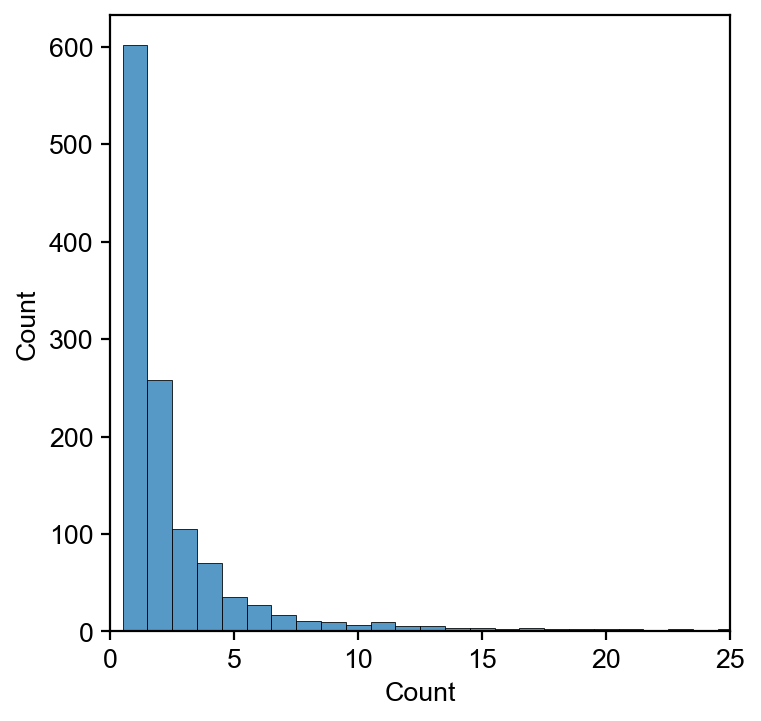

In [14]:
bins = np.arange(0.5, graph_bias_count_df['Count'].max() + 0.5, 1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    graph_bias_count_df,
    x='Count',
    bins=bins,
    ax=ax,
)
ax.set_xlim(0, 25)

(0.0, 25.0)

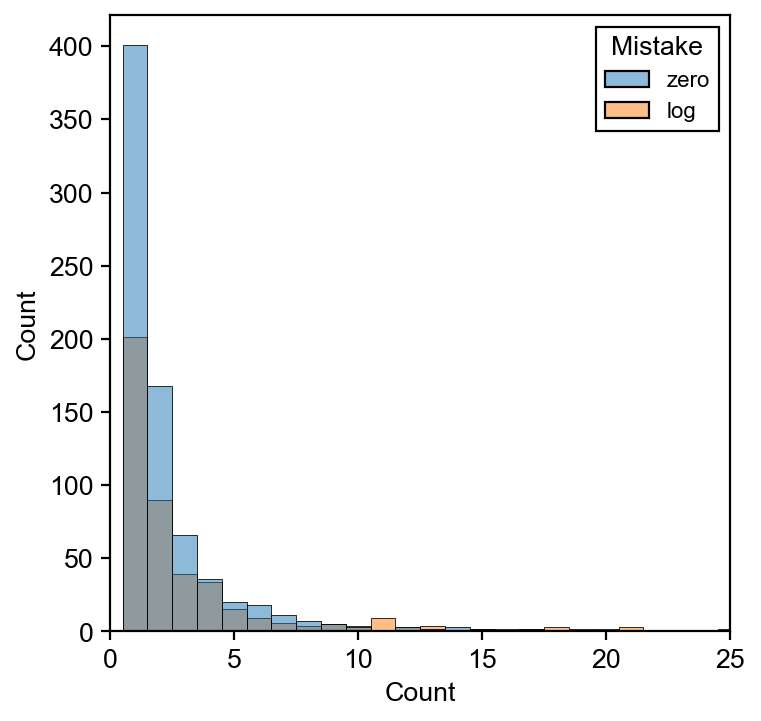

In [15]:
bins = np.arange(0.5, graph_bias_count_df['Count'].max() + 0.5, 1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    graph_bias_count_df,
    x='Count',
    hue='Mistake',
    bins=bins,
    ax=ax,
)
ax.set_xlim(0, 25)

(0.0, 60.0)

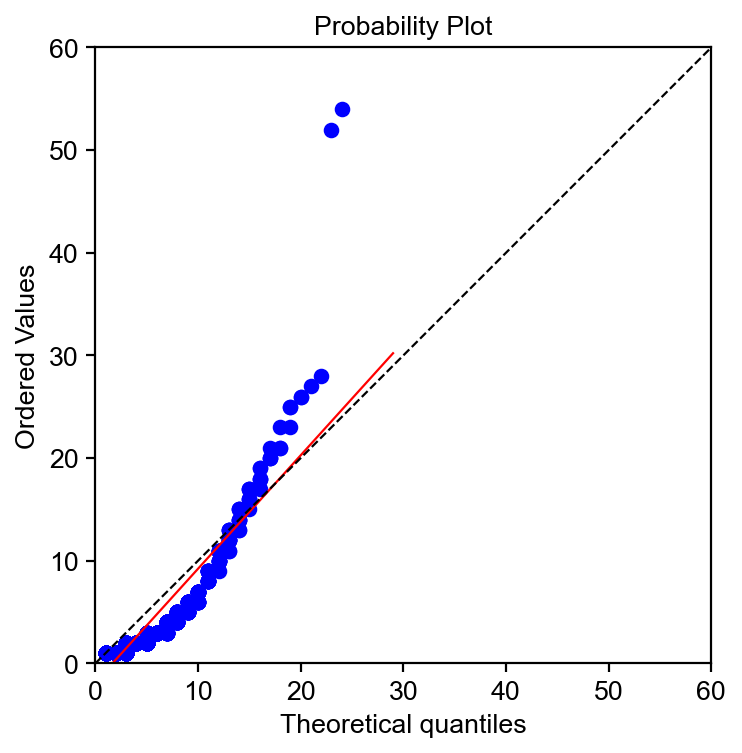

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
res = scipy.stats.probplot(
    graph_bias_count_df['Count'],
    dist=scipy.stats.geom,
    sparams=(0.23,),
    plot=ax,
)
ax.plot([0, 60], [0, 60], 'k--')
ax.set_box_aspect(1)
ax.set_aspect('equal')
ax.set_xlim(0, 60)
ax.set_ylim(0, 60)

### Quantifying frequency of making mistakes

In [17]:
# 同一篇文章（DOI）里能犯几个不同的错误（mistake, physical quantity）？
# journal redundant but for later use
# how many mistake (with graph-level bias mitigated) do people make per article?

mistake_count_df = graph_bias_count_df.groupby(['Journal', 'DOI', 'Mistake']).count()['Count']
mistake_count_df = mistake_count_df.reset_index()
mistake_count_df

,Journal,DOI,Mistake,Count
0,acs_nano,10.1021:acsnano.2c07293,zero,1
1,acs_nano,10.1021:acsnano.2c07436,log,1
2,acs_nano,10.1021:acsnano.2c07436,zero,1
3,acs_nano,10.1021:acsnano.2c07439,zero,1
4,acs_nano,10.1021:acsnano.2c08153,log,1
...,...,...,...,...
871,science,10.1126:science.adi2246,log,2
872,science,10.1126:science.adi4720,zero,1
873,science,10.1126:science.adi8885,log,1
874,science,10.1126:science.adi8885,zero,2


(0.0, 7.0)

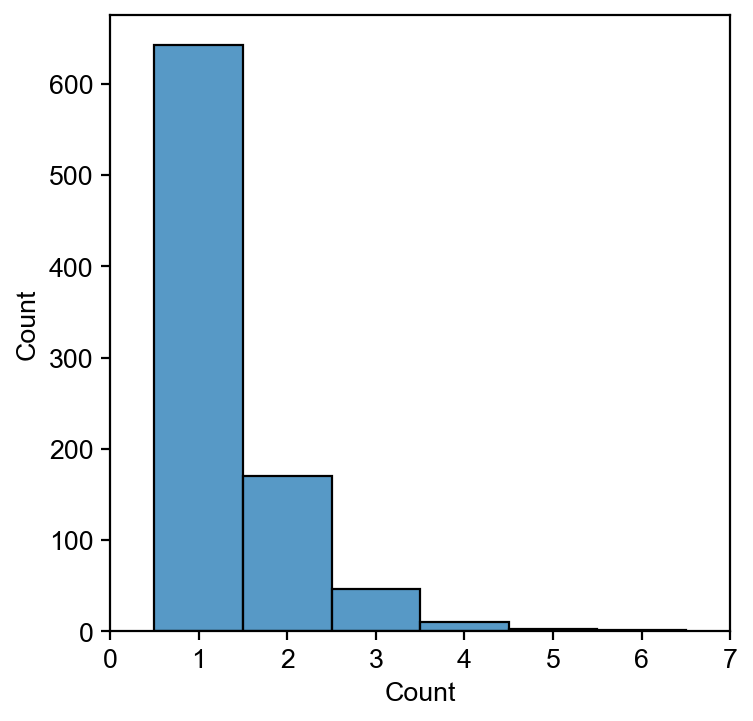

In [18]:
bins = np.arange(0.5, mistake_count_df['Count'].max() + 0.5, 1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    mistake_count_df,
    x='Count',
    bins=bins,
    ax=ax,
)
ax.set_xlim(0, 7)

(0.0, 7.0)

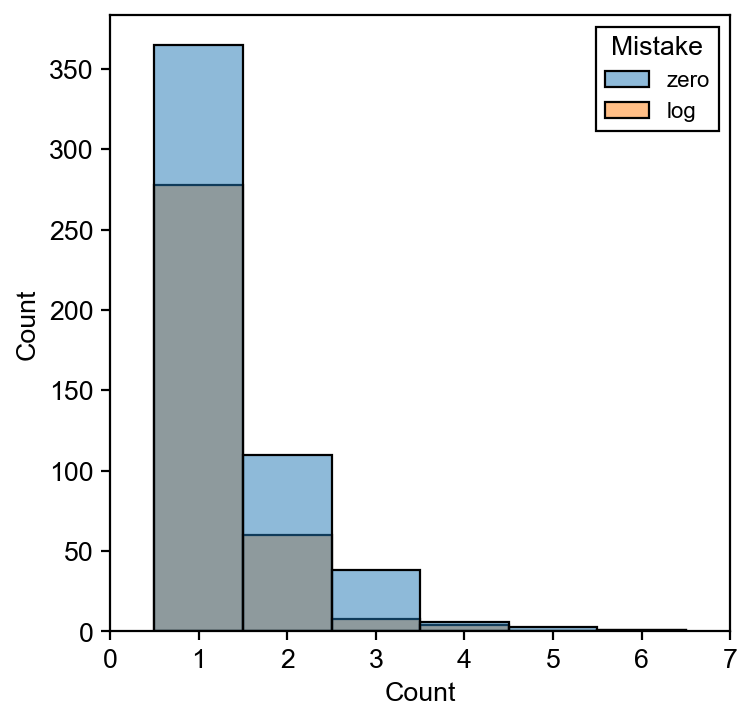

In [19]:
bins = np.arange(0.5, mistake_count_df['Count'].max() + 0.5, 1)
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    mistake_count_df,
    x='Count',
    hue='Mistake',
    bins=bins,
    ax=ax,
)
ax.set_xlim(0, 7)

(0.0, 8.0)

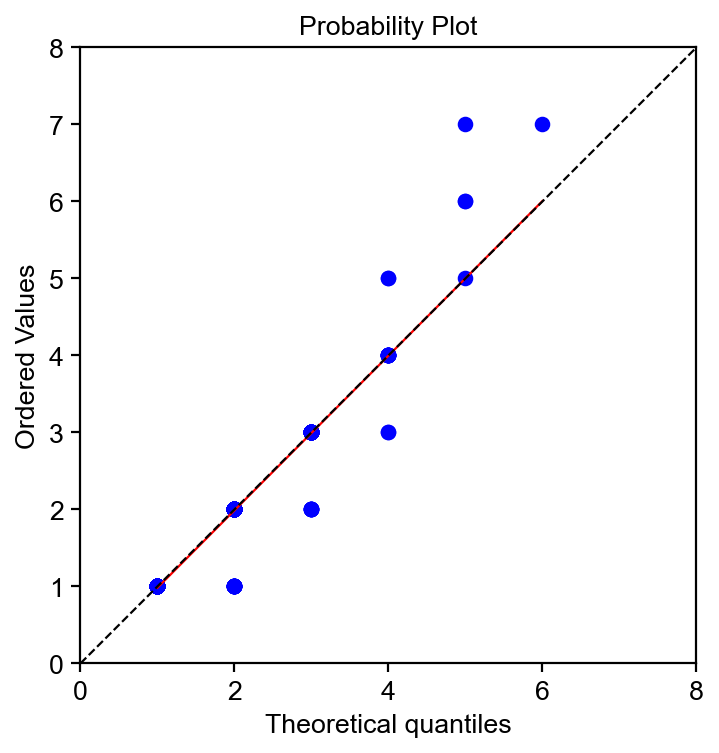

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
res = scipy.stats.probplot(
    mistake_count_df['Count'],
    dist=scipy.stats.geom,
    sparams=(0.72,),
    plot=ax,
)
xmax = 8
ymax = xmax
ax.plot([0, xmax], [0, ymax], 'k--')
ax.set_box_aspect(1)
ax.set_aspect('equal')
ax.set_xlim(0, xmax)
ax.set_ylim(0, ymax)

## Amount of mistakes per journal

In [21]:
mistake_count_df

,Journal,DOI,Mistake,Count
0,acs_nano,10.1021:acsnano.2c07293,zero,1
1,acs_nano,10.1021:acsnano.2c07436,log,1
2,acs_nano,10.1021:acsnano.2c07436,zero,1
3,acs_nano,10.1021:acsnano.2c07439,zero,1
4,acs_nano,10.1021:acsnano.2c08153,log,1
...,...,...,...,...
871,science,10.1126:science.adi2246,log,2
872,science,10.1126:science.adi4720,zero,1
873,science,10.1126:science.adi8885,log,1
874,science,10.1126:science.adi8885,zero,2


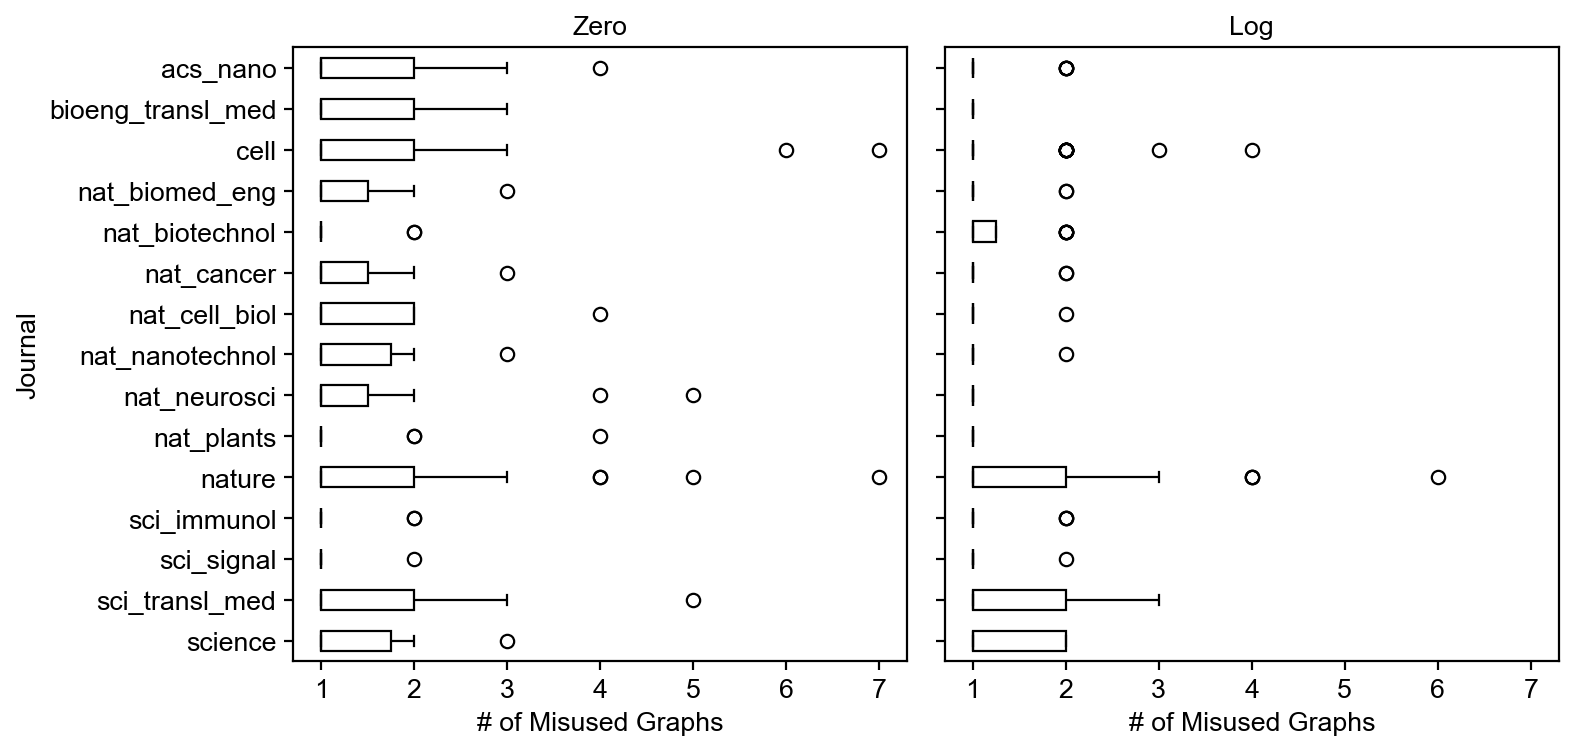

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
sns.boxplot(
    mistake_count_df[mistake_count_df['Mistake'] == 'zero'],
    y='Journal',
    x='Count',
    ax=axs[0],
    color='w',
    linecolor='k',
    width=0.5,
    # showfliers=False,
)
sns.boxplot(
    mistake_count_df[mistake_count_df['Mistake'] == 'log'],
    y='Journal',
    x='Count',
    ax=axs[1],
    color='w',
    linecolor='k',
    width=0.5,
    # showfliers=False,
)
axs[0].set_title('Zero')
axs[1].set_title('Log')
for i in range(2):
    axs[i].set_box_aspect(1)
    # axs[i].set_xlim(0, 4)
    axs[i].set_xlabel('# of Misused Graphs')
plt.tight_layout()

In [23]:
mistake_count_df.loc[mistake_count_df['Mistake'] == 'log'].groupby('Journal').agg({'Count': 'mean'})

,Count
Journal,
acs_nano,1.090909
bioeng_transl_med,1.000000
cell,1.278689
nat_biomed_eng,1.095238
nat_biotechnol,1.250000
nat_cancer,1.117647
nat_cell_biol,1.083333
nat_nanotechnol,1.200000
nat_neurosci,1.000000


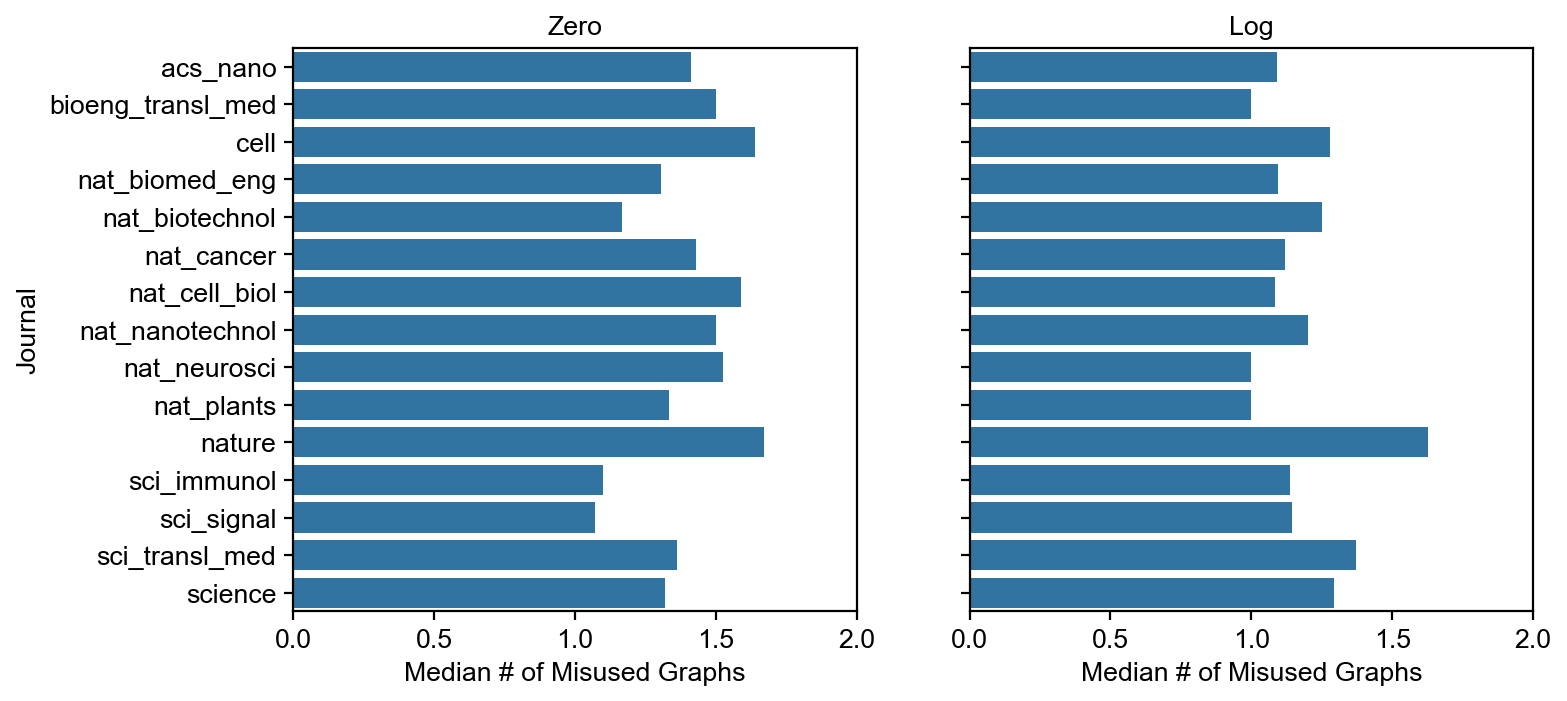

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
sns.barplot(
    mistake_count_df.loc[mistake_count_df['Mistake'] == 'zero'].groupby('Journal').agg({'Count': 'mean'}).reset_index(),
    y='Journal',
    x='Count',
    ax=axs[0],
)
sns.barplot(
    mistake_count_df.loc[mistake_count_df['Mistake'] == 'log'].groupby('Journal').agg({'Count': 'mean'}).reset_index(),
    y='Journal',
    x='Count',
    ax=axs[1],
)
axs[0].set_title('Zero')
axs[1].set_title('Log')
for i in range(2):
    axs[i].set_box_aspect(1)
    axs[i].set_xlim(0, 2)
    axs[i].set_xlabel('Median # of Misused Graphs')

In [25]:
author_filename = f'data/zotero_data/{journal}.csv'


In [26]:
author_df = pd.read_csv(author_filename)['Author'].str.split(';', expand=True)

<Axes: >

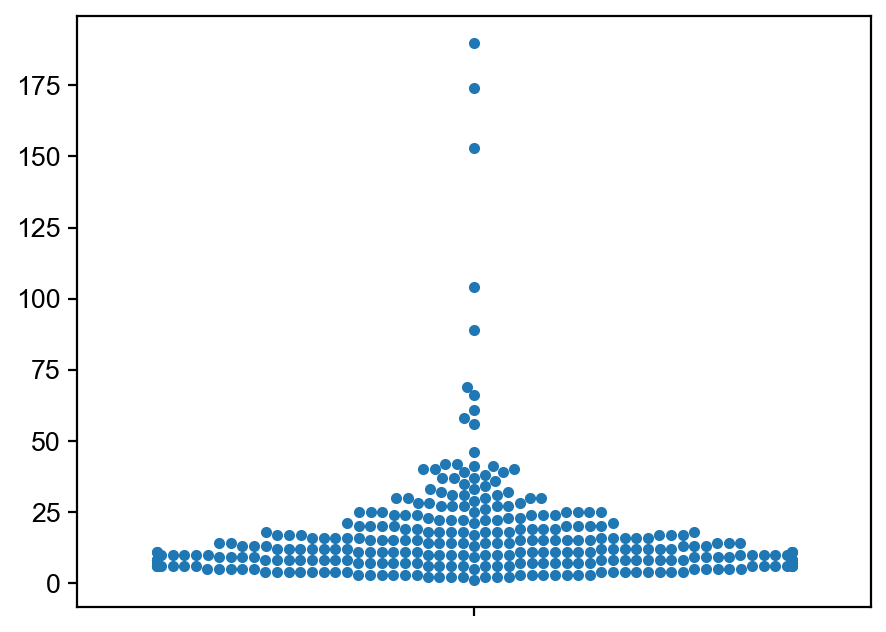

In [27]:
sns.swarmplot((~pd.isna(author_df)).sum(axis=1))

In [28]:
(~pd.isna(author_df)).sum(axis=1)

0       6
1      18
2       8
3      11
4       6
       ..
308     4
309    40
310     2
311    26
312    58
Length: 313, dtype: int64